# 준비

## 라이브러리 호출

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored

import warnings
warnings.filterwarnings(action='ignore')

pd.options.display.max_columns = 14 # 칼럼수 50개까지

## 데이터

In [2]:
# 영화 데이터
movie_titles_df = pd.read_csv("Movie_Id_Titles")
display(movie_titles_df)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [3]:
# 영화 점수 데이터
movies_rating_df = pd.read_csv('u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
movies_rating_df = movies_rating_df.drop(['timestamp'], axis = 1) # 영화 길이 데이터 제거
print(colored("Movies_rating_df :", "red"), end="")
display(movies_rating_df)
print(colored("Movies_rating_df - Describe : ", "red"), end="")
display(movies_rating_df.describe())
print(colored("Movies_rating_df - Info : ","red"))
display(movies_rating_df.info())

Movies_rating_df :

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3
...,...,...,...
99998,880,476,3
99999,716,204,5
100000,276,1090,1
100001,13,225,2


Movies_rating_df - Describe : 

,user_id,item_id,rating
count,100003.000000,100003.000000,100003.000000
mean,462.470876,425.520914,3.529864
std,266.622454,330.797791,1.125704
min,0.000000,1.000000,1.000000
25%,254.000000,175.000000,3.000000
50%,447.000000,322.000000,4.000000
75%,682.000000,631.000000,4.000000
max,943.000000,1682.000000,5.000000


Movies_rating_df - Info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  100003 non-null  int64
 1   item_id  100003 non-null  int64
 2   rating   100003 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


None

### `두 df 합치기`

In [4]:
movies_rating_df = pd.merge(movies_rating_df, movie_titles_df, on = 'item_id')
print(colored("Movies_rating_df with movie titles: ","red"))
display(movies_rating_df)

Movies_rating_df with movie titles: 


,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)
...,...,...,...,...
99998,840,1674,4,Mamma Roma (1962)
99999,655,1640,3,"Eighth Day, The (1996)"
100000,655,1637,3,Girls Town (1996)
100001,655,1630,3,"Silence of the Palace, The (Saimt el Qusur) (1..."


## `EDA`

In [17]:
ratings_df_mean = movies_rating_df.groupby('title')['rating'].describe()['mean'] # 평균 점수
ratings_df_count = movies_rating_df.groupby('title')['rating'].describe()['count'] #  평가 개수
ratings_mean_count_df = pd.concat([ratings_df_count, ratings_df_mean], axis = 1).reset_index() # 영화별 평균 점수, 평가개수 df 생성
print(colored("Movies - count - Mean :","red"))
display(ratings_mean_count_df)

Movies - count - Mean :


,title,count,mean
0,'Til There Was You (1997),9.0,2.333333
1,1-900 (1994),5.0,2.600000
2,101 Dalmatians (1996),109.0,2.908257
3,12 Angry Men (1957),125.0,4.344000
4,187 (1997),41.0,3.024390
...,...,...,...
1659,Young Guns II (1990),44.0,2.772727
1660,"Young Poisoner's Handbook, The (1995)",41.0,3.341463
1661,Zeus and Roxanne (1997),6.0,2.166667
1662,unknown,9.0,3.444444


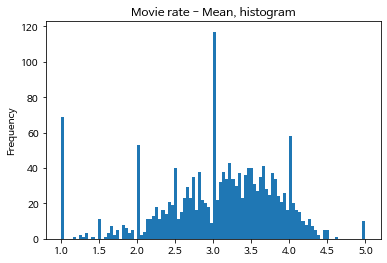

In [21]:
ratings_mean_count_df['mean'].plot(bins=100, kind='hist', title="Movie rate - Mean, histogram");

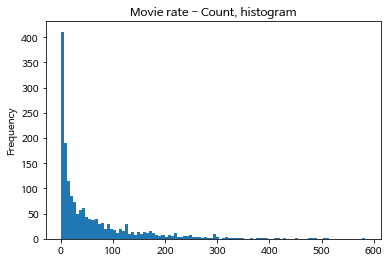

In [22]:
ratings_mean_count_df['count'].plot(bins=100, kind='hist', title="Movie rate - Count, histogram");

In [25]:
display(ratings_mean_count_df[ratings_mean_count_df['mean'] == 5]) # 만점 데이터 확인

,title,count,mean
30,Aiqing wansui (1994),1.0,5.0
462,Entertaining Angels: The Dorothy Day Story (1996),1.0,5.0
633,"Great Day in Harlem, A (1994)",1.0,5.0
944,Marlene Dietrich: Shadow and Light (1996),1.0,5.0
1172,Prefontaine (1997),3.0,5.0
1273,"Saint of Fort Washington, The (1993)",2.0,5.0
1277,Santa with Muscles (1996),2.0,5.0
1359,Someone Else's America (1995),1.0,5.0
1387,Star Kid (1997),3.0,5.0
1472,They Made Me a Criminal (1939),1.0,5.0


In [46]:
display(ratings_mean_count_df.sort_values('count', ascending = False).head(15)) # 가장 많은 평가 개수 데이터 확인

,title,count,mean
1398,Star Wars (1977),584.0,4.359589
333,Contact (1997),509.0,3.803536
498,Fargo (1996),508.0,4.155512
1234,Return of the Jedi (1983),507.0,4.007890
860,Liar Liar (1997),485.0,3.156701
460,"English Patient, The (1996)",481.0,3.656965
1284,Scream (1996),478.0,3.441423
1523,Toy Story (1995),452.0,3.878319
32,Air Force One (1997),431.0,3.631090
744,Independence Day (ID4) (1996),429.0,3.438228


# `'User-Item Matrix'`

In [40]:
userid_movietitle_matrix = movies_rating_df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
print(colored("userid_movietitle_matrix :","red"))
display(userid_movietitle_matrix)

userid_movietitle_matrix :


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",...,Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,...,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## titanic

In [41]:
titanic = userid_movietitle_matrix['Titanic (1997)']
print(colored("titanic score :","red"))
display(titanic[:10])

titanic score :


user_id
0    NaN
1    NaN
2    5.0
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: Titanic (1997), dtype: float64

In [74]:
titanic = userid_movietitle_matrix['Titanic (1997)']
print(colored("titanic score :","red"))
display(titanic[:10])

print(colored("ratings_mean_count_df :","red"))
display(ratings_mean_count_df)

titanic_correlations = pd.DataFrame(userid_movietitle_matrix.corrwith(titanic), columns=['Correlation'])
titanic_correlations.reset_index(inplace=True)
titanic_correlations = titanic_correlations.join(ratings_mean_count_df["count"])

print(colored("\ntitanic correlation with other movie :","red"))
display(titanic_correlations)
titanic_correlations.dropna(inplace=True)
print(colored("\ntitanic correlation with other movie (Have count) :","red"))
display(titanic_correlations)
print(colored("\ntitanic correlation Correlation ascending :","red"))
display(titanic_correlations.sort_values('Correlation', ascending=False))
print(colored("\ntitanic correlation Correlation ascending with count > 80:","red"))
display(titanic_correlations[titanic_correlations['count']>80].sort_values('Correlation',ascending=False))

titanic score :


user_id
0    NaN
1    NaN
2    5.0
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: Titanic (1997), dtype: float64

ratings_mean_count_df :


,title,count,mean
0,'Til There Was You (1997),9.0,2.333333
1,1-900 (1994),5.0,2.600000
2,101 Dalmatians (1996),109.0,2.908257
3,12 Angry Men (1957),125.0,4.344000
4,187 (1997),41.0,3.024390
...,...,...,...
1659,Young Guns II (1990),44.0,2.772727
1660,"Young Poisoner's Handbook, The (1995)",41.0,3.341463
1661,Zeus and Roxanne (1997),6.0,2.166667
1662,unknown,9.0,3.444444



titanic correlation with other movie :


,title,Correlation,count
0,'Til There Was You (1997),-0.062017,9.0
1,1-900 (1994),NaN,5.0
2,101 Dalmatians (1996),0.120113,109.0
3,12 Angry Men (1957),0.077700,125.0
4,187 (1997),0.315654,41.0
...,...,...,...
1659,Young Guns II (1990),0.317274,44.0
1660,"Young Poisoner's Handbook, The (1995)",0.356783,41.0
1661,Zeus and Roxanne (1997),NaN,6.0
1662,unknown,NaN,9.0



titanic correlation with other movie (Have count) :


,title,Correlation,count
0,'Til There Was You (1997),-0.062017,9.0
2,101 Dalmatians (1996),0.120113,109.0
3,12 Angry Men (1957),0.077700,125.0
4,187 (1997),0.315654,41.0
5,2 Days in the Valley (1996),0.017295,93.0
...,...,...,...
1655,Year of the Horse (1997),1.000000,7.0
1657,Young Frankenstein (1974),0.107666,200.0
1658,Young Guns (1988),0.199931,101.0
1659,Young Guns II (1990),0.317274,44.0



titanic correlation Correlation ascending :


,title,Correlation,count
1038,Nadja (1994),1.0,8.0
1140,"Pest, The (1997)",1.0,8.0
1278,"Savage Nights (Nuits fauves, Les) (1992)",1.0,3.0
541,For Ever Mozart (1996),1.0,3.0
779,"Jerky Boys, The (1994)",1.0,3.0
...,...,...,...
1130,Pather Panchali (1955),-1.0,8.0
72,Angel Baby (1995),-1.0,4.0
189,Blood Beach (1981),-1.0,6.0
1548,Two Bits (1995),-1.0,5.0



titanic correlation Correlation ascending with count > 80:


,title,Correlation,count
1500,Titanic (1997),1.000000,350.0
1244,"River Wild, The (1994)",0.497600,146.0
16,"Abyss, The (1989)",0.472103,151.0
223,Bram Stoker's Dracula (1992),0.443560,120.0
1533,True Lies (1994),0.435104,208.0
...,...,...,...
226,Brazil (1985),-0.243532,208.0
1238,Richard III (1995),-0.275451,89.0
321,Cold Comfort Farm (1995),-0.307150,125.0
1558,"Unbearable Lightness of Being, The (1988)",-0.314476,92.0


## Star wars

In [78]:
userid_movietitle_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",...,Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,...,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
# Pick up star wars movie and repeat the excerise
star_wars = userid_movietitle_matrix['Star Wars (1977)']
print(colored("star_wars score :","red"))
display(star_wars[:10])

print(colored("ratings_mean_count_df :","red"))
display(ratings_mean_count_df)

star_wars_correlations = pd.DataFrame(userid_movietitle_matrix.corrwith(star_wars), columns=['Correlation'])
star_wars_correlations.reset_index(inplace=True)
star_wars_correlations = star_wars_correlations.join(ratings_mean_count_df["count"])

print(colored("\n star_wars correlation with other movie :","red"))
display(star_wars_correlations)
star_wars_correlations.dropna(inplace=True)
print(colored("\n star_wars correlation with other movie (Have count) :","red"))
display(star_wars_correlations)
print(colored("\n star_wars correlation Correlation ascending :","red"))
display(star_wars_correlations.sort_values('Correlation', ascending=False))
print(colored("\n star_wars correlation Correlation ascending with count > 80:","red"))
display(star_wars_correlations[star_wars_correlations['count']>80].sort_values('Correlation',ascending=False))

star_wars score :


user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
6    4.0
7    5.0
8    5.0
9    5.0
Name: Star Wars (1977), dtype: float64

ratings_mean_count_df :


,title,count,mean
0,'Til There Was You (1997),9.0,2.333333
1,1-900 (1994),5.0,2.600000
2,101 Dalmatians (1996),109.0,2.908257
3,12 Angry Men (1957),125.0,4.344000
4,187 (1997),41.0,3.024390
...,...,...,...
1659,Young Guns II (1990),44.0,2.772727
1660,"Young Poisoner's Handbook, The (1995)",41.0,3.341463
1661,Zeus and Roxanne (1997),6.0,2.166667
1662,unknown,9.0,3.444444



 star_wars correlation with other movie :


,title,Correlation,count
0,'Til There Was You (1997),0.872872,9.0
1,1-900 (1994),-0.645497,5.0
2,101 Dalmatians (1996),0.211132,109.0
3,12 Angry Men (1957),0.184289,125.0
4,187 (1997),0.027398,41.0
...,...,...,...
1659,Young Guns II (1990),0.228615,44.0
1660,"Young Poisoner's Handbook, The (1995)",-0.007374,41.0
1661,Zeus and Roxanne (1997),0.818182,6.0
1662,unknown,0.723123,9.0



 star_wars correlation with other movie (Have count) :


,title,Correlation,count
0,'Til There Was You (1997),0.872872,9.0
1,1-900 (1994),-0.645497,5.0
2,101 Dalmatians (1996),0.211132,109.0
3,12 Angry Men (1957),0.184289,125.0
4,187 (1997),0.027398,41.0
...,...,...,...
1658,Young Guns (1988),0.186377,101.0
1659,Young Guns II (1990),0.228615,44.0
1660,"Young Poisoner's Handbook, The (1995)",-0.007374,41.0
1661,Zeus and Roxanne (1997),0.818182,6.0



 star_wars correlation Correlation ascending :


,title,Correlation,count
688,Hollow Reed (1996),1.0,6.0
326,Commandments (1997),1.0,3.0
343,Cosi (1996),1.0,4.0
1072,No Escape (1994),1.0,5.0
1418,Stripes (1981),1.0,5.0
...,...,...,...
541,For Ever Mozart (1996),-1.0,3.0
557,Frankie Starlight (1995),-1.0,4.0
722,I Like It Like That (1994),-1.0,3.0
54,American Dream (1990),-1.0,2.0



 star_wars correlation Correlation ascending with count > 80:


,title,Correlation,count
1398,Star Wars (1977),1.000000,584.0
456,"Empire Strikes Back, The (1980)",0.748353,368.0
1234,Return of the Jedi (1983),0.672556,507.0
1205,Raiders of the Lost Ark (1981),0.536117,420.0
104,Austin Powers: International Man of Mystery (1...,0.377433,130.0
...,...,...,...
419,Dirty Dancing (1987),-0.156920,98.0
577,G.I. Jane (1997),-0.176734,175.0
475,Evil Dead II (1987),-0.190719,89.0
527,"First Wives Club, The (1996)",-0.194496,160.0


# STEP#4: CREATE AN ITEM-BASED COLLABORATIVE FILTER ON THE ENTIRE DATASET 

In [80]:
# Recall this matrix that we created earlier of all movies and their user ID/ratings
userid_movietitle_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",...,Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,...,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
movie_correlations = userid_movietitle_matrix.corr(method = 'pearson', min_periods = 80)
movie_correlations

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",...,Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Young Poisoner's Handbook, The (1995)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zeus and Roxanne (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
myRatings = pd.read_csv("./My_Ratings.csv")
myRatings

In [86]:
len(myRatings.index)

2

In [87]:
myRatings['Movie Name'][0]

'Liar Liar (1997)'

In [88]:
similar_movies_list = pd.Series()
for i in range(0, 2):
    similar_movie = movie_correlations[myRatings['Movie Name'][i]].dropna() # Get same movies with same ratings
    similar_movie = similar_movie.map(lambda x: x * myRatings['Ratings'][i]) # Scale the similarity by your given ratings
    similar_movies_list = similar_movies_list.append(similar_movie)

In [89]:
similar_movies_list.sort_values(inplace = True, ascending = False)
print (similar_movies_list.head(10))

Liar Liar (1997)                             5.000000
Con Air (1997)                               2.349141
Pretty Woman (1990)                          2.348951
Michael (1996)                               2.210110
Indiana Jones and the Last Crusade (1989)    2.072136
Top Gun (1986)                               2.028602
G.I. Jane (1997)                             1.989656
Multiplicity (1996)                          1.984302
Grumpier Old Men (1995)                      1.953494
Ghost and the Darkness, The (1996)           1.895376
dtype: float64
